In [1]:
import numpy as np
import pandas as pd

## Data pre-processing

### Read 10x and adaptive tcr sequencing data

---

**10x TCR Data (`tenx_data`)**:
- **Origin**: This dataset comes from 10X TCR sequencing (all_contig_annotations.csv).
- **Mandatory Columns**:
  - **barcode**: Unique identifier for each single cell.
  - **chain**: The specific T cell receptor chain being analyzed.
  - **cdr3**: The amino acid sequence of the CDR3 region.
  - **cdr3_nt**: The nucleotide sequence of the CDR3 region.
  - **v_gene** (also known as TCR V gene name): Represents the variable gene segment of the T cell receptor. It's a part of the TCR's genetic makeup.
  - **j_gene**: Represents the joining gene segment of the T cell receptor.
  - **raw_consensus_id**: A unique identifier for the consensus sequence.

**Note**: Different versions of the sequencing data might have alternative column names. Always refer to the latest documentation or data specification to ensure compatibility.

---

**Adaptive TRB Data (`adap_data`)**:
- **Origin**: This dataset comes from Adaptive TRB sequencing.
- **Mandatory Columns**:
  - **v_resolved**: Represents the resolved variable gene segment of the T cell receptor, analogous to the `v_gene` in the TCR data.
  - **j_resolved**: Represents the resolved joining gene segment of the T cell receptor.
  - **rearrangement**: The nucleotide (nt) sequence representing the rearranged T cell receptor gene.
  - **amino_acid**: Represents the amino acid sequence of the CDR3 region, a crucial part of the TCR that interacts with antigens.
  - **productive_frequency**: Frequency of productive T cell receptors with the given rearrangement.

**Note**: As with the TCR data, different versions of the Adaptive TRB sequencing data might have alternative column names. Users should always refer to the latest documentation or data specification to ensure proper understanding and compatibility.

---

In [2]:
tenx_file = '/Users/zw2595/Documents/workstation/data/jian/MJ018/all_contig_annotations.csv'
adap_file = '/Users/zw2595/Dropbox/Jianing/Pt21 postTx MLR/Pt21 include postTx MLR_RearrangementDetails_12-26-2019_4-42-35_PM.tsv'


In [3]:
tenx_data = pd.read_csv(tenx_file)
adap_data = pd.read_csv(adap_file, sep='\t')

In [4]:
tenx_data.head(5)

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id
0,AAACCTGAGCGTCTAT-1,True,AAACCTGAGCGTCTAT-1_contig_1,True,654,TRB,TRBV19,NaN,TRBJ1-5,TRBC1,True,True,CASTDRENQPQHF,TGTGCCAGCACAGACAGGGAGAATCAGCCCCAGCATTTT,1258,4,clonotype4,clonotype4_consensus_1
1,AAACCTGAGCGTCTAT-1,True,AAACCTGAGCGTCTAT-1_contig_2,True,687,TRA,TRAV8-3,NaN,TRAJ4,TRAC,True,True,CAVGARSGYNKLIF,TGTGCTGTGGGTGCGCGGAGTGGCTACAATAAGCTGATTTTT,1604,5,clonotype4,clonotype4_consensus_2
2,AAACCTGAGCGTCTAT-1,True,AAACCTGAGCGTCTAT-1_contig_3,True,305,None,NaN,NaN,TRBJ2-2P,TRBC2,False,False,NaN,NaN,1430,3,NaN,NaN
3,AAACCTGAGCTAAGAT-1,True,AAACCTGAGCTAAGAT-1_contig_1,True,462,TRA,TRAV13-1,NaN,TRAJ35,TRAC,True,True,CAARSIGFGNVLHC,TGTGCAGCAAGGTCGATAGGCTTTGGGAATGTGCTGCATTGC,500,1,clonotype410,clonotype410_consensus_2
4,AAACCTGAGCTAAGAT-1,True,AAACCTGAGCTAAGAT-1_contig_2,True,694,TRB,TRBV2,NaN,TRBJ1-6,NaN,True,True,CASSKDSPLHF,TGTGCCAGCAGCAAGGATTCACCCCTCCACTTT,426,2,clonotype410,clonotype410_consensus_1


In [5]:
adap_data.head(5)

,sample_name,productive_frequency,templates,amino_acid,rearrangement,v_resolved,d_resolved,j_resolved
0,Pt21_MVTx_POD306_PBMC_R-4U,0.179088,5998,CASTDRENQPQHF,ACTGTGACATCGGCCCAAAAGAACCCGACAGCTTTCTATCTCTGTG...,TCRBV19-01,TCRBD01-01*01,TCRBJ01-05*01
1,Pt21_MVTx_Bx_duodenum_POD243_sorted_T,0.173913,8,CASSLGGRTQYF,CTGAATGTGAACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCT...,TCRBV05-06*01,TCRBD02-01*02,TCRBJ02-03*01
2,Pt21_Post_ileum_day0262,0.157714,276,CASSSRQGSGNTIYF,AGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGCGCCAGCA...,TCRBV05-01*01,TCRBD01-01*01,TCRBJ01-03*01
3,Pt21_MVTx_POD306_PBMC_R-8U,0.155189,15238,CASSLGDRAYEQYF,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,TCRBV07-09,TCRBD01-01*01,TCRBJ02-07*01
4,Pt21_MVTx_POD306_PBMC_R-8L_D_SP,0.128365,3104,CASSLGDRAYEQYF,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,TCRBV07-09,TCRBD01-01*01,TCRBJ02-07*01


In [6]:
adap_data['sample_name'].value_counts()

Pt21_Pre_Recipient_CD4_unstim                  120529
Pt21_Pre_Recipient_CD8_unstim                   88070
Pt21_MVTx_POD626_ileum_Bx                       79416
Pt21_Pre_Donor_CD4_unstim                       68943
Pt21_MVTx_POD626_PBMC_T                         60370
Pt21_Pre_Donor_CD8_unstim                       49813
Pt21_MVTx_LN_gut_associated_POD262_sorted_T     45286
Pt21_Post_PBMC_day0262                          26469
Pt21_MVTx_POD306_PBMC_R-4U                      24857
Pt21_Post_PBMC_day0023                          22361
Pt21_Pre_Recipient_CD8_CFSElo                   22197
Pt21_Pre_Recipient_CD4_CFSElo                   19538
Pt21_Post_PBMC_day0109                          15208
Pt21_MVTx_POD626_LN_T                           13035
Pt21_MVTx_POD306_PBMC_R-8U                      12193
Pt21_Pre_Donor_CD4_CFSElo                       10575
Pt21_Pre_Donor_CD8_CFSElo                        9862
Pt21_Post_PBMC_day0011                           4384
Pt21_MVTx_POD306_PBMC_R-4L_D

### Subsample Focusing

In some experiments or analyses, it might not be necessary to process or consider all available samples. To enhance efficiency and relevancy, you can focus on specific subsamples. The code you provided demonstrates this concept:

```python
# This variable contains the name of the specific sample you're interested in. 
# It acts as a filter to limit subsequent analyses to just this sample.
sample_name = sample name in the adap_data['sample_name']

# This is the path to the file that contains the Adaptive TRB data for the specific sample named above.
# This file will likely contain rows of labeled T cell receptor sequences or related data.
labeled_adap_file = #your labeled adaptive TRB 

# This code reads the contents of the labeled TCR file and creates a list, 
# where each item in the list is a line from the file (excluding the trailing newline character).
# Essentially, this list contains all the TRB sequences you are interested in.
labeled_trb = open(labeled_tcr_file,'r').readlines() #with some processing to ensure the output is a TRB nt sequence list
```

**Explanation**:
1. `sample_name`: Represents the identifier for a specific sample in the dataset. This name can be used to filter or subset the Adaptive data to hone in on the relevant sample.
2. `labeled_adap_file`: Provides the path to the file that contains the labeled TRB sequences for the specified sample. This file will be crucial in extracting sequences and relevant data for further analyses.
3. `labeled_trb`: This is a list that contains the T cell receptor beta (TRB) sequences you're interested in. These sequences might have been identified through prior experiments or based on existing scientific knowledge.

---

By utilizing the `sample_name` and the contents of `labeled_trb`, subsequent analyses can be targeted and more efficient. The provided sequences in `labeled_trb` can act as a reference or be cross-referenced with other datasets to glean insights.

In [7]:
sample_name = 'Pt21_MVTx_POD306_PBMC_R-8L_D_SP'

In [10]:
labeled_adap_file = '/Users/zw2595/Dropbox/Jianing/Pt21 postTx MLR/Pt21_HvG_pre_post/Pt21 CD8 post-Tx POD306 HVGlist.txt'

#The code reads each line from the file, and removes the trailing newline character, and adds the sequence to the list.
labeled_trb = [i[:-1] for i in open(labeled_adap_file,'r').readlines()]

In [11]:
labeled_trb[:5]

['TTGTTGCTAGGGGACTCGGCCCTCTATCTCTGTGCCAGCAGCGGGGGTAGGACGACTCTCCGCAATCAGCCCCAGCATTTTGGTGAT',
 'TCGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCAGCAGTTTATATCGAGGAGGCCCCTACAATGAGCAGTTCTTCGGGCCA',
 'AGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGCGCCAGCAGCGAAGCGGGAGTCGGCACCGGGGAGCTGTTTTTTGGAGAA',
 'GCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCAGCCCTTTGGCGAGCGGGGACACCTACAATGAGCAGTTCTTCGGGCCA',
 'CTCAGGCTGGAGTCGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCAGCAGTGAAGAGTGGTACGAGCAGTACTTCGGGCCG']

## Data processing

### Linking 10X TCR Sequencing Data with Adaptive TRB Sequencing Data

The objective of this data processing is to establish a connection between the information provided by 10X TCR sequencing data and Adaptive TRB sequencing data, emphasizing the relevant features of T-cell receptors (TCR). To achieve this, the code is structured into three main functions, each with a specific purpose:

1. **`treatcr(tenx_data)`**:
    - This function processes the 10X TCR sequencing data.
    - Filters the data to focus on T-cell receptors with the 'TRB' chain that have identifiable V and J gene segments.
    - Further categorizes the V and J regions for better analysis.
    - Counts the occurrences of each TCR clonotype, indicating clonal expansion which can be crucial for understanding immune responses.

2. **`treathvg(adap_data, sample_name='', labeled_trb=[])`**:
    - This function deals with the Adaptive TRB sequencing data.
    - Depending on provided parameters, it can focus on specific samples or labeled TCR sequences.
    - It ensures the V and J regions of the TCR are resolved (i.e., identifiable).
    - Similar to `treatcr`, it further categorizes the V and J regions for nuanced analysis.

3. **`link(tcr_data, hvg_data, level=1)`**:
    - This function links the processed data from both the above functions.
    - The linking can be done at different levels based on V and J regions. 
    - At level 1, it considers the V and J gene families, while at level 2, it takes into account the subtypes as well.
    - The output is a filtered TCR dataset that matches with the Adaptive TRB sequences based on the linking criteria.

Lastly, the main workflow combines the functionality of the three functions to deliver a consolidated result:
1. It processes the 10X TCR sequencing data.
2. Processes the Adaptive TRB sequencing data by focusing on specific samples and labeled TRB sequences.
3. Establishes a link between the two processed datasets, resulting in the final output: `tcr_sel`.

In essence, the provided code enables a detailed comparison and integration of 10X TCR sequencing data with Adaptive TRB sequencing data, highlighting relevant T-cell receptor sequences and their properties.

--- 

In [12]:
def treatcr(tenx_data):
    # 1. Filter out data rows based on specific conditions.
    #    - We're specifically interested in T cell receptors with the 'TRB' chain. 
    #    - We also ensure that the V and J regions have been identified and that there's a consensus ID.
    #    Making a copy of the filtered DataFrame avoids any potential issues with modifying the original data.
    tcr_data = tenx_data[
        (tenx_data['chain'] == 'TRB') & 
        (tenx_data['v_gene'] != 'None') & 
        (tenx_data['j_gene'] != 'None') & 
        (tenx_data['raw_consensus_id'] != 'None')
    ].copy()

    # 2. Split the 'v_gene' and 'j_gene' columns by '-'
    #    The V (Variable) and J (Joining) regions in the TCR sequences often have a format like 'TRBV6-4'.
    #    Here, we're separating out the main family (e.g., 'TRBV6') from the specific subtype (e.g., '4').
    tcr_data['V_split'] = tcr_data['v_gene'].str.split('-')
    tcr_data['J_split'] = tcr_data['j_gene'].str.split('-')
    
    # 3. Extract relevant sub-strings from the split columns to derive 'V1', 'V2', 'J1', and 'J2' columns
    #    This helps in further categorizing and analyzing the V and J regions separately.
    tcr_data['V1'] = tcr_data['V_split'].str[0].str[4:].str.zfill(2)  # Extract the V family
    tcr_data['V2'] = tcr_data['V_split'].str[1].str.zfill(2).fillna('01')  # Extract the V subtype
    tcr_data['J1'] = tcr_data['J_split'].str[0].str[4:].str.zfill(2)  # Similar extraction for the J region
    tcr_data['J2'] = tcr_data['J_split'].str[1].str.zfill(2).fillna('01')
    
    # 4. Drop the temporary columns that were used for splitting.
    tcr_data.drop(columns=['V_split', 'J_split'], inplace=True)

    # 5. Count occurrences of each 'raw_clonotype_id' and map those counts to a new column '#clones'
    #    This gives us an idea of the clonal expansion of each TCR, which can be indicative of an immune response.
    tcr_data['#clones'] = tcr_data['raw_clonotype_id'].map(tcr_data['raw_clonotype_id'].value_counts())
    
    # 6. Return the desired columns in the specified order.
    #    These columns contain relevant information for further TCR analysis.
    return tcr_data[['barcode', 'raw_clonotype_id', 'cdr3', 'cdr3_nt', '#clones', 'V1', 'V2', 'J1', 'J2']]


In [13]:
def treathvg(adap_data, sample_name='', labeled_trb=[]):
    """
    Process and extract relevant information from adaptive TRB sequencing data.
    
    Parameters:
    - adap_data: DataFrame containing the adaptive TRB sequencing data
    - sample_name: Name of the sample to be filtered (if specified)
    - labeled_trb: List of labeled CDR3 nucleotide sequences
    
    Returns:
    DataFrame with columns ['rearrangement','amino_acid','V1','V2','J1','J2','productive_frequency']
    """
    
    # If no sample name or labeled data is provided, filter out rows where V and J gene annotations are unresolved.
    # Otherwise, further filter based on sample name and labeled TRB sequences.
    if not sample_name and not labeled_trb:
        hvg_data = adap_data[
            (adap_data['v_resolved'].str[:2] != 'un') & 
            (adap_data['j_resolved'].str[:2] != 'un') 
        ].copy()
    
    elif not sample_name:
        hvg_data = adap_data[
            (adap_data['v_resolved'].str[:2] != 'un') & 
            (adap_data['j_resolved'].str[:2] != 'un') &
            (adap_data['rearrangement'].isin(labeled_trb))
        ].copy()
    elif not labeled_trb:
        adap_data = adap_data[adap_data['sample_name'] == sample_name].copy()
        hvg_data = adap_data[
            (adap_data['v_resolved'].str[:2] != 'un') & 
            (adap_data['j_resolved'].str[:2] != 'un')
        ] 
    else:
        adap_data = adap_data[adap_data['sample_name'] == sample_name].copy()
        hvg_data = adap_data[
            (adap_data['v_resolved'].str[:2] != 'un') & 
            (adap_data['j_resolved'].str[:2] != 'un') & 
            (adap_data['rearrangement'].isin(labeled_trb))
        ] 

    # Remove duplicate rows based on 'rearrangement' to get unique sequences.
    hvg_data = hvg_data.drop_duplicates(subset='rearrangement', keep='first')

    # Extract the V and J gene families and subtypes for further analysis.
    hvg_data['V_split'] = hvg_data['v_resolved'].str.split('-')
    hvg_data['J_split'] = hvg_data['j_resolved'].str.split('-')
    
    hvg_data['V1'] = hvg_data['V_split'].str[0].str[5:]
    hvg_data['V2'] = hvg_data['V_split'].str[1].str[:2].fillna('01')
    hvg_data['J1'] = hvg_data['J_split'].str[0].str[5:]
    hvg_data['J2'] = hvg_data['J_split'].str[1].str[:2].fillna('01')
    
    # Drop the temporary columns used for splitting.
    hvg_data.drop(columns=['V_split', 'J_split'], inplace=True)

    # Return the desired columns with important TCR information.
    return hvg_data[['rearrangement', 'amino_acid', 'V1', 'V2', 'J1', 'J2', 'productive_frequency']]


In [14]:
def link(tcr_data, hvg_data, level=1):
    """
    Links the outputs of treatcr and treathvg functions based on the given criteria.
    
    Parameters:
    ----------
    tcr_data : pd.DataFrame
        The DataFrame from the treatcr function output.
    hvg_data : pd.DataFrame
        The DataFrame from the treathvg function output.
    level : int, optional (default=1)
        Determines the linking criteria.
        If 1, links based on 'V1' and 'J1';
        if 2, uses 'V1', 'V2', 'J1', and 'J2'.
    
    Returns:
    --------
    pd.DataFrame
        Represents linked data from treatcr and treathvg outputs.
    """
    
    indexs = []
    ans = []

    for index, row in tcr_data.iterrows():
        # Filter out records that have the row['cdr3_nt'] sequence in them.
        matched_records = hvg_data[hvg_data['rearrangement'].str.contains(row['cdr3_nt'], na=False, regex=False)]
        
        ans_temp = []
        
        for _, rec in matched_records.iterrows():
            # Determine match criteria based on the level argument.
            is_match = False
            if level == 1:
                is_match = rec['V1'] == row['V1'] and rec['J1'] == row['J1']
            elif level == 2:
                is_match = (rec['V1'] == row['V1'] and rec['V2'] == row['V2'] and
                            rec['J1'] == row['J1'] and rec['J2'] == row['J2'])
            
            if is_match:
                indexs.append(index)
                ans_temp.append(rec['rearrangement'])
                
        if ans_temp:
            ans.append(ans_temp)

    ans_list = ['; '.join(temp) for temp in ans]
    indexs = sorted(set(indexs))
    tcr_sel = tcr_data.loc[indexs]
    tcr_sel['Adaptive NT sequences'] = ans_list

    return tcr_sel


In [15]:
tcr_data = treatcr(tenx_data)

In [35]:
tcr_data.head()

,barcode,raw_clonotype_id,cdr3,cdr3_nt,#clones,V1,V2,J1,J2
0,AAACCTGAGCGTCTAT-1,clonotype4,CASTDRENQPQHF,TGTGCCAGCACAGACAGGGAGAATCAGCCCCAGCATTTT,90.0,19,01,01,05
4,AAACCTGAGCTAAGAT-1,clonotype410,CASSKDSPLHF,TGTGCCAGCAGCAAGGATTCACCCCTCCACTTT,1.0,02,01,01,06
7,AAACCTGAGTAGCCGA-1,NaN,CASSLGDRAYEQYF,TGTGCCAGCAGCTTAGGGGACAGGGCCTACGAGCAGTACTTC,NaN,07,09,02,07
9,AAACCTGCACGTGAGA-1,clonotype257,CSAPPWGSVGYTF,TGCAGTGCTCCGCCGTGGGGCTCCGTCGGCTACACCTTC,1.0,20,01,01,02
10,AAACCTGCACGTGAGA-1,NaN,CASSPGTS,TGTGCCAGCAGTCCCGGGACTAGC,NaN,28,01,02,03


In [18]:
hvg_data = treathvg(adap_data, sample_name, labeled_trb)

In [34]:
hvg_data.head()

,rearrangement,amino_acid,V1,V2,J1,J2,productive_frequency
67,TTGTTGCTAGGGGACTCGGCCCTCTATCTCTGTGCCAGCAGCGGGG...,CASSGGRTTLRNQPQHF,05,07,01,05,0.022869
129,CTCAGGCTGGAGTCGGCTGCTCCCTCCCAGACATCTGTGTACTTCT...,CASSEEWYEQYF,06,01,02,07,0.013647
176,GCCTTGGAGCTGGACGACTCGGCCCTGTATCTCTGTGCCAGCAGCT...,CASSLGGTLNFYGYTF,05,04,01,02,0.008643
184,ACAGTGACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCA...,CSAELQGSETQYF,20,01,02,05,0.008436
187,AGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGCGCCAGCA...,CASSEAGVGTGELFF,05,01,02,02,0.008271


In [20]:
tcr_sel = link(tcr_data, hvg_data, 2)

In [36]:
tcr_sel.head()

,barcode,raw_clonotype_id,cdr3,cdr3_nt,#clones,V1,V2,J1,J2,Adaptive NT sequences
7,AAACCTGAGTAGCCGA-1,NaN,CASSLGDRAYEQYF,TGTGCCAGCAGCTTAGGGGACAGGGCCTACGAGCAGTACTTC,NaN,07,09,02,07,TTCCAGCGCACACAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...
15,AAACGGGAGGAGTACC-1,clonotype19,CASSVLAGPYNEQFF,TGTGCCAGCAGCGTACTAGCGGGGCCCTACAATGAGCAGTTCTTC,11.0,09,01,02,01,GAGCTCTCTGGAGCTGGGGACTCAGCTTTGTATTTCTGTGCCAGCA...
16,AAACGGGAGGATGGTC-1,NaN,CASSLGDRAYEQYF,TGTGCCAGCAGCTTAGGGGACAGGGCCTACGAGCAGTACTTC,NaN,07,09,02,07,TTCCAGCGCACACAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...
25,AAACGGGAGTCTCAAC-1,NaN,CASSLGDRAYEQYF,TGTGCCAGCAGCTTAGGGGACAGGGCCTACGAGCAGTACTTC,NaN,07,09,02,07,TTCCAGCGCACACAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...
78,AAAGCAATCAGATAAG-1,clonotype3,CASSQDIRVGGYTF,TGTGCCAGCAGCCAAGATATCCGGGTTGGAGGCTACACCTTC,120.0,03,01,01,02,CATCAATTCCTGGAGCTTGGTGACTCTGCTGTGTATTTCTGTGCCA...


### random inspection

In [33]:
tcr_sel.iloc[0]

barcode                                                 AAACCTGAGTAGCCGA-1
raw_clonotype_id                                                       NaN
cdr3                                                        CASSLGDRAYEQYF
cdr3_nt                         TGTGCCAGCAGCTTAGGGGACAGGGCCTACGAGCAGTACTTC
#clones                                                                NaN
V1                                                                      07
V2                                                                      09
J1                                                                      02
J2                                                                      07
Adaptive NT sequences    TTCCAGCGCACACAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...
Name: 7, dtype: object

In [23]:
tcr_sel.iloc[0]['Adaptive NT sequences']

'TTCCAGCGCACACAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTAGGGGACAGGGCCTACGAGCAGTACTTCGGGCCG; TCCAGCGCACAAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTAGGGGACAGGGCCTACGAGCAGTACTTCGGGCCG; ATGAGCTCCTTGGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTAGGGGACAGGGCCTACGAGCAGTACTTCGGGCCG; GTGAGCACCTTGGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTAGGGGACAGGGCCTACGAGCAGTACTTCGGGCCG'

In [92]:
tcr_sel.iloc[188]

barcode                                                 CGTCAGGAGAAGGACA-1
raw_clonotype_id                                               clonotype16
cdr3                                                         CASSFGQTGELFF
cdr3_nt                            TGTGCCAGCAGCTTTGGGCAAACCGGGGAGCTGTTTTTT
#clones                                                               13.0
V1                                                                      07
V2                                                                      08
J1                                                                      02
J2                                                                      02
Adaptive NT sequences    GAAGATCCAGCGCACACAGCAGAGGACTCCGCCGTGTATCTCTGTG...
Name: 5520, dtype: object

In [93]:
tcr_sel.iloc[188]['Adaptive NT sequences']

'GAAGATCCAGCGCACACAGCAGAGGACTCCGCCGTGTATCTCTGTGCCAGCAGCTTTGGGCAAACCGGGGAGCTGTTTTTTGGAGAA; GAAGATCCAGCGCACACAGCGGAGGACTCCGCCGTGTATCTCTGTGCCAGCAGCTTTGGGCAAACCGGGGAGCTGTTTTTTGGAGAA'

### Let's estimate the overlaps

In [39]:
print (len(tcr_data), len(adap_data), len(hvg_data), len(tcr_sel))

5117 701532 2135 464


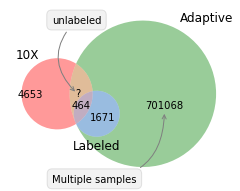

In [77]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles
plt.figure(figsize=(4,4))
v = venn3(subsets=(5117 - 464, 20000 - 464, 0, 0, 0, 2135 - 464, 464), set_labels = ('10X', 'Adaptive', 'Labeled'))
#v.get_patch_by_id('100').set_alpha(1.0)
#v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('010').set_text('701068')
v.get_label_by_id('110').set_text('?')
#v.get_label_by_id('A').set_text('Set "A"')
#c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
#c[0].set_lw(1.0)
#c[0].set_ls('dotted')
#plt.title("Sample Venn diagram")
plt.annotate('Multiple samples', xy=v.get_label_by_id('010').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.annotate('unlabeled', xy=v.get_label_by_id('110').get_position() - np.array([0.01, 0]), xytext=(0,70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

### Exhaustive search of all candidates 
It will take a while to run. Only for need to know the exact number of all matched TCRB.

In [78]:
hvg_data_all = treathvg(adap_data, '', [])

In [79]:
tcr_sel_all = link(tcr_data, hvg_data_all, 2)

In [80]:
len(tcr_sel_all)

2962

Finally, we got the exact number of each part. However, 10x TCR could match multiple adaptive records, and the same 10x barcode may have multiple TCR beta chains. The numbers are still approximate.

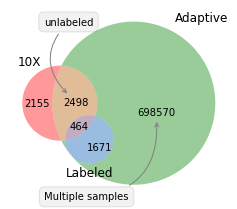

In [95]:
plt.figure(figsize=(4,4))
v = venn3(subsets=(5117 - 2962, 20000 - 464, 2962 - 464, 0, 0, 2135 - 464, 464), set_labels = ('10X', 'Adaptive', 'Labeled'))
#v.get_patch_by_id('100').set_alpha(1.0)
#v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('010').set_text(str(701532 - 2962))
#v.get_label_by_id('110').set_text('?')
#v.get_label_by_id('A').set_text('Set "A"')
#c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
#c[0].set_lw(1.0)
#c[0].set_ls('dotted')
#plt.title("Sample Venn diagram")
plt.annotate('Multiple samples', xy=v.get_label_by_id('010').get_position() - np.array([0, 0.05]), xytext=(-70,-80),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.annotate('unlabeled', xy=v.get_label_by_id('110').get_position() - np.array([0.05, -0.05]), xytext=(0,70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()